# Exploratory Analysis: 
1. Univariate stats: Analysis of individual data
2. Bivariate stats: analysis of interactions of 2 variables
3. Multivaraiate stats: analysis of interactions of 3+ variables

In [1]:
#importds 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

import wrangle as wr

In [2]:
telco = wr.clean_telco_data()
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


### Prep Work:
- making independent variables
- making dependent variable: 'Churn'

In [3]:
# first need to aquire my data:
train, validate, test = wr.split_telco_data()
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
84,0135-NMXAP,Female,0,No,No,12,Yes,Yes,No,Yes,...,No,Yes,No,Yes,89.75,1052.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
5021,7055-JCGNI,Female,0,No,No,70,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,111.95,7795.95,No,Two year,Fiber optic,Credit card (automatic)
1577,2296-DKZFP,Female,0,Yes,No,65,Yes,No,Yes,Yes,...,No,No,Yes,No,71.00,4386.20,No,Two year,DSL,Bank transfer (automatic)
6366,9025-AOMKI,Female,0,No,No,6,Yes,Yes,No,No,...,No,Yes,Yes,Yes,93.55,536.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
3387,4817-VYYWS,Female,0,No,No,30,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,100.20,2983.80,Yes,Month-to-month,Fiber optic,Electronic check


In [4]:
# partition out x (independent vars, features)
# partition out y (dependent var, target)

X_train = train.drop(columns=['churn','customer_id'])
y_train = train[['churn']]

# for utiliy: set a variable for a target varibale 
target = 'churn'

In [5]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the X_train data frame:
for col in train.columns:
    # if the column is an object:
    if train[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if train[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [6]:
cat_cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [7]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

## Univariate stats: 
For the quantitiative varible: 
- I created a histogram and boxplot.
- I also added the descriptive statistics

### Numerical variables:

Distribution of tenure
count    3943.000000
mean       32.618565
std        24.626661
min         0.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


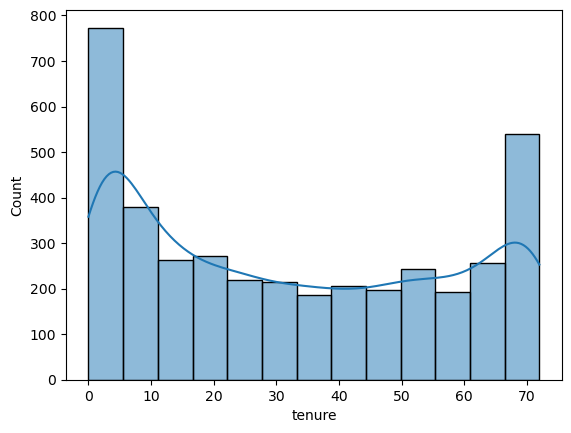

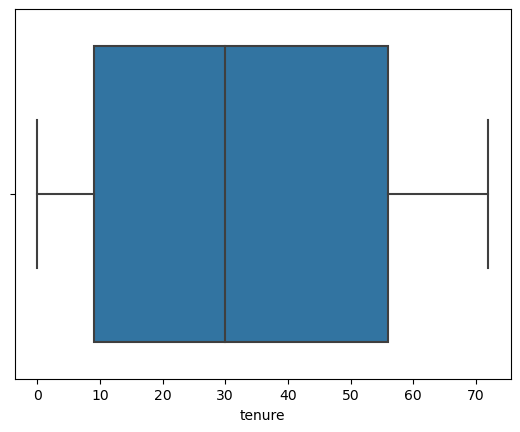

Distribution of monthly_charges
count    3943.000000
mean       64.728595
std        30.040853
min        18.700000
25%        35.950000
50%        70.200000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


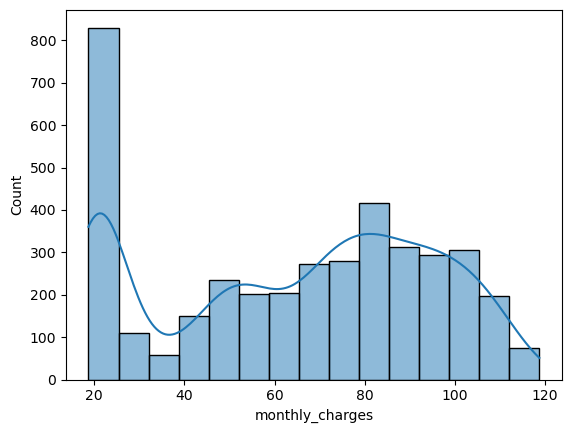

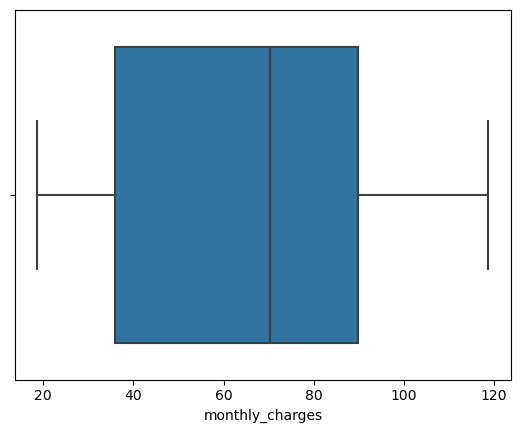

Distribution of total_charges
count     3943.000000
mean      3174.065458
std       6565.662644
min          0.000000
25%        416.350000
50%       1493.200000
75%       4138.475000
max      84050.000000
Name: total_charges, dtype: float64


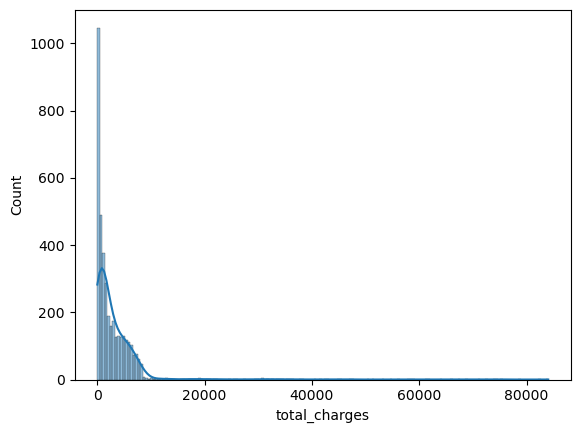

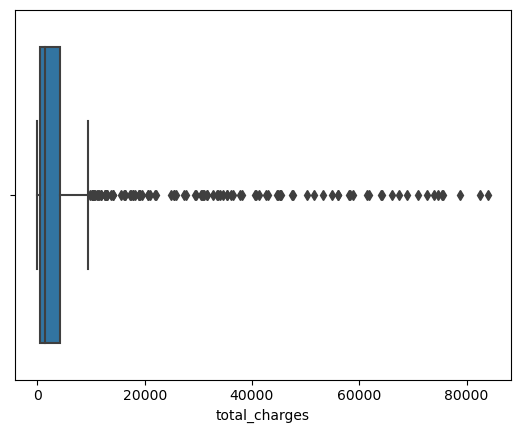

In [8]:
# making a for loop makes things go by much faster:
# Quantitative first:
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # show descriptive statistics
    print(train[col].describe())
    # first graph is a histogram: 
    sns.histplot(data=train, x = col, kde=True)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=train, x = col)
    plt.show()
    print('=======================')

#### Takeaways:
- Total charges has a postive skew moslty around lower total_charges.
    - There are a large amount of outliers
- Monthly charges looks to be more binomial, with peak around the lower charges. 
- Tenure shows a higher amount of customers either being new or older but a lower amount in the mean tenure range.

#### Functions:

In [9]:
def visualize_univariate_num(train, num_cols):
    for col in num_cols:
        # Print out the title
        print(f'Distribution of {col}')
        
        # Show descriptive statistics
        print(train[col].describe())
        
        # First graph is a histogram
        sns.histplot(data=train, x=col, kde=True)
        plt.show()
        
        # Second graph is a boxplot
        sns.boxplot(data=train, x=col)
        plt.show()
        
        print('=======================')

In [10]:
#explore_univariate_num(train, num_cols)

### Categorical Variables: 
- Look at the frequency of each categorical variable
- Plot a visualization that best fits the data

In [11]:
cat_cols

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [12]:
# look a churn specifically:
y_train.describe()

,churn
count,3943
unique,2
top,No
freq,2897


Frequncy of customer_id
count           3943
unique          3943
top       0135-NMXAP
freq               1
Name: customer_id, dtype: object
0135-NMXAP    1
7606-BPHHN    1
6559-PDZLR    1
0924-BJCRC    1
6994-KERXL    1
             ..
6551-GNYDG    1
7389-KBFIT    1
6425-JWTDV    1
5780-INQIK    1
8498-XXGWA    1
Name: customer_id, Length: 3943, dtype: int64


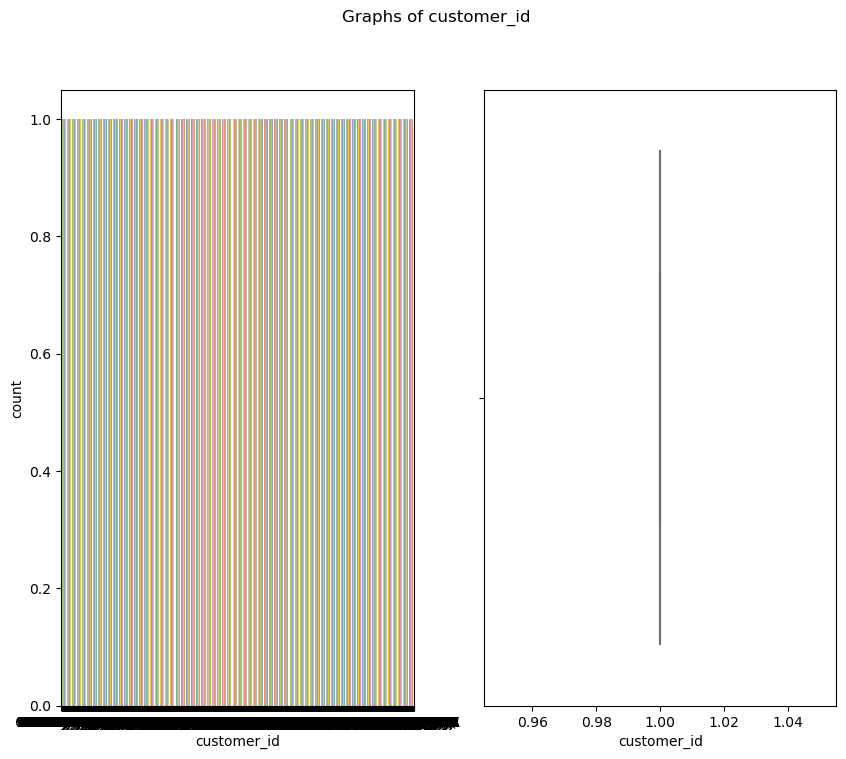

----------###---------
Frequncy of gender
count     3943
unique       2
top       Male
freq      1987
Name: gender, dtype: object
Male      1987
Female    1956
Name: gender, dtype: int64


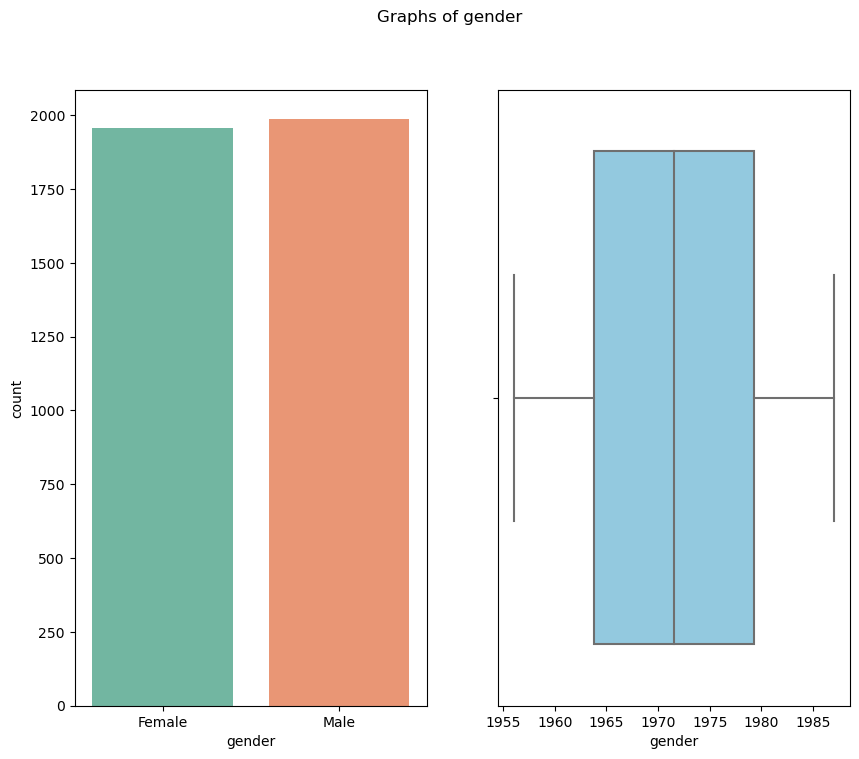

----------###---------
Frequncy of senior_citizen
count    3943.000000
mean        0.164342
std         0.370633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64
0    3295
1     648
Name: senior_citizen, dtype: int64


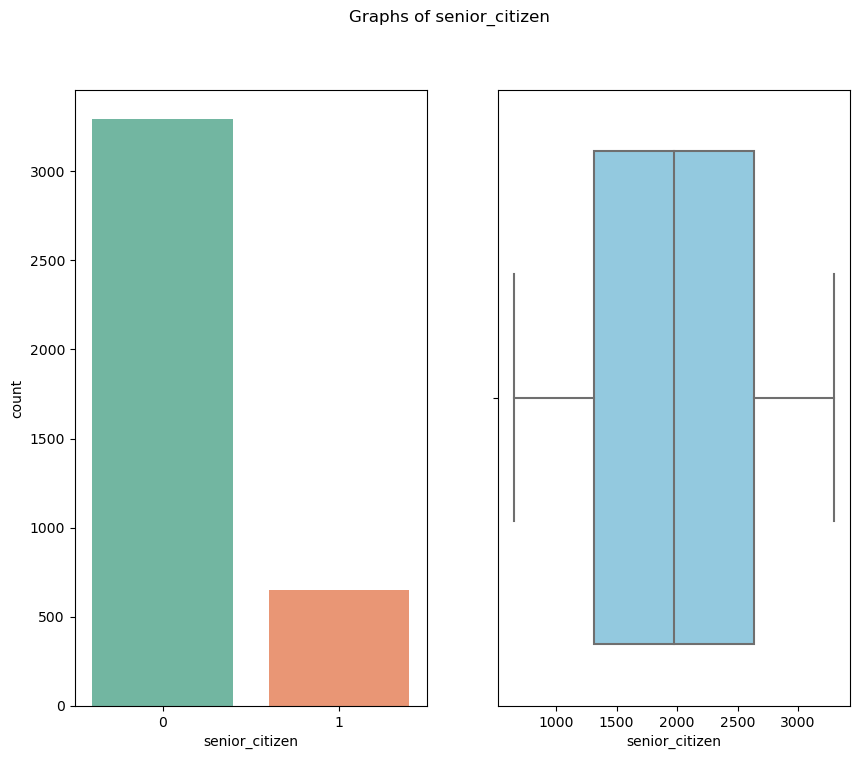

----------###---------
Frequncy of partner
count     3943
unique       2
top         No
freq      2037
Name: partner, dtype: object
No     2037
Yes    1906
Name: partner, dtype: int64


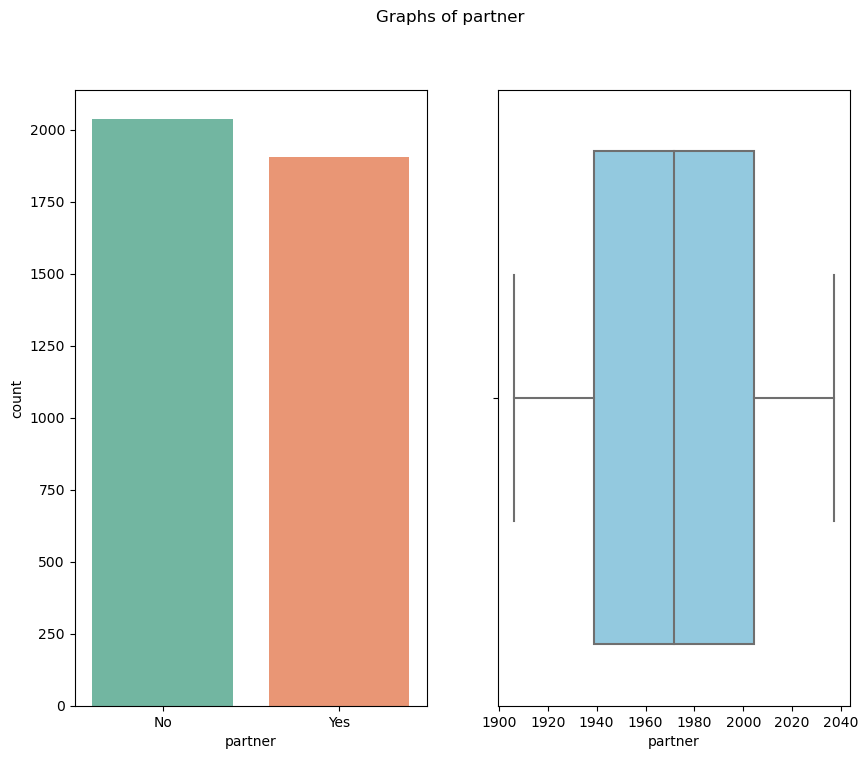

----------###---------
Frequncy of dependents
count     3943
unique       2
top         No
freq      2758
Name: dependents, dtype: object
No     2758
Yes    1185
Name: dependents, dtype: int64


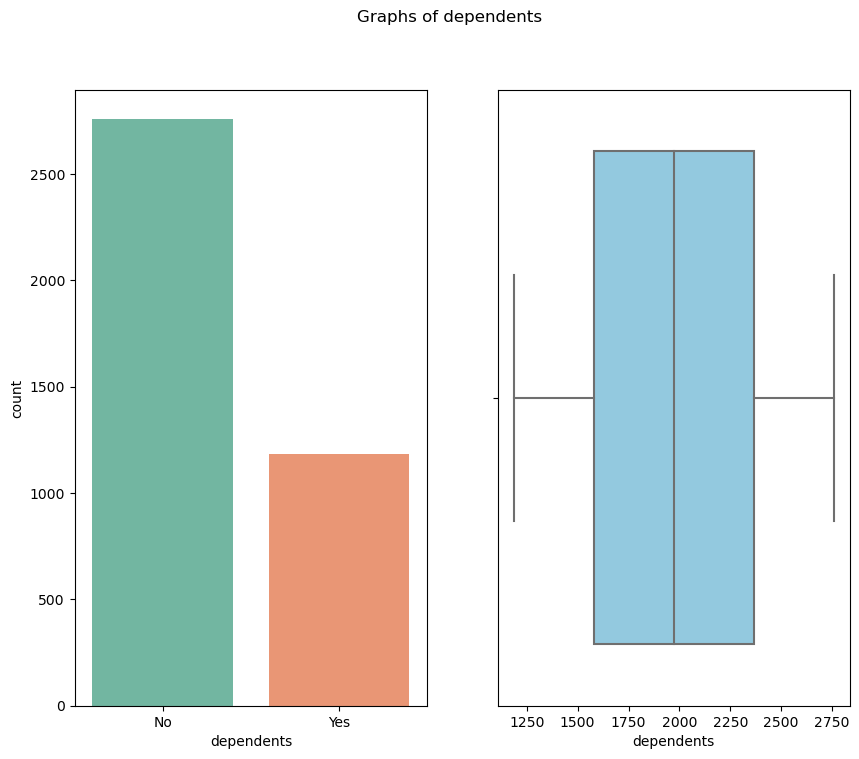

----------###---------
Frequncy of phone_service
count     3943
unique       2
top        Yes
freq      3554
Name: phone_service, dtype: object
Yes    3554
No      389
Name: phone_service, dtype: int64


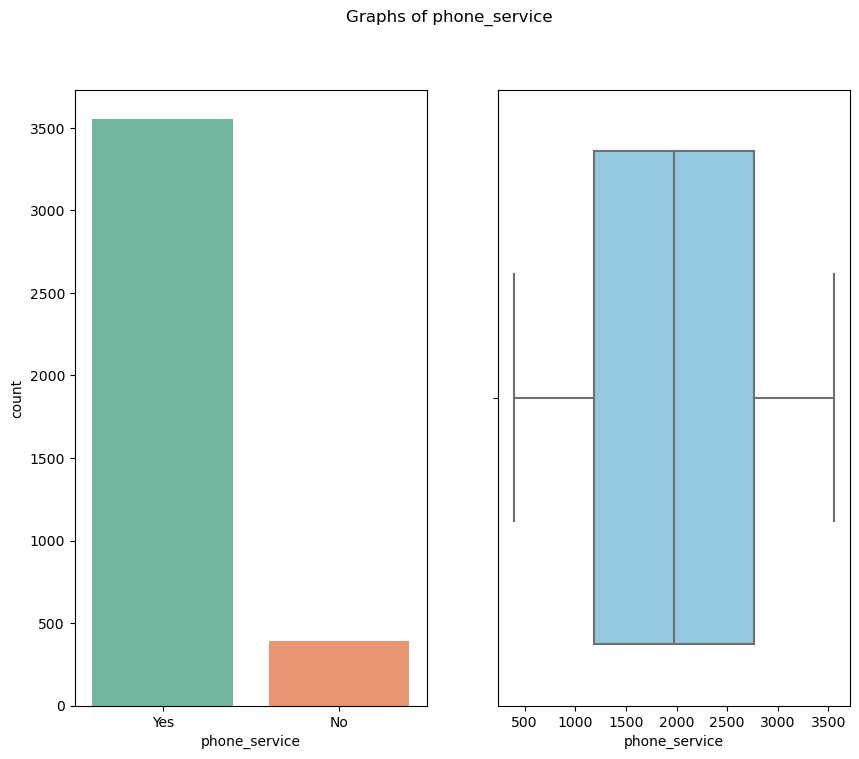

----------###---------
Frequncy of multiple_lines
count     3943
unique       3
top         No
freq      1897
Name: multiple_lines, dtype: object
No                  1897
Yes                 1657
No phone service     389
Name: multiple_lines, dtype: int64


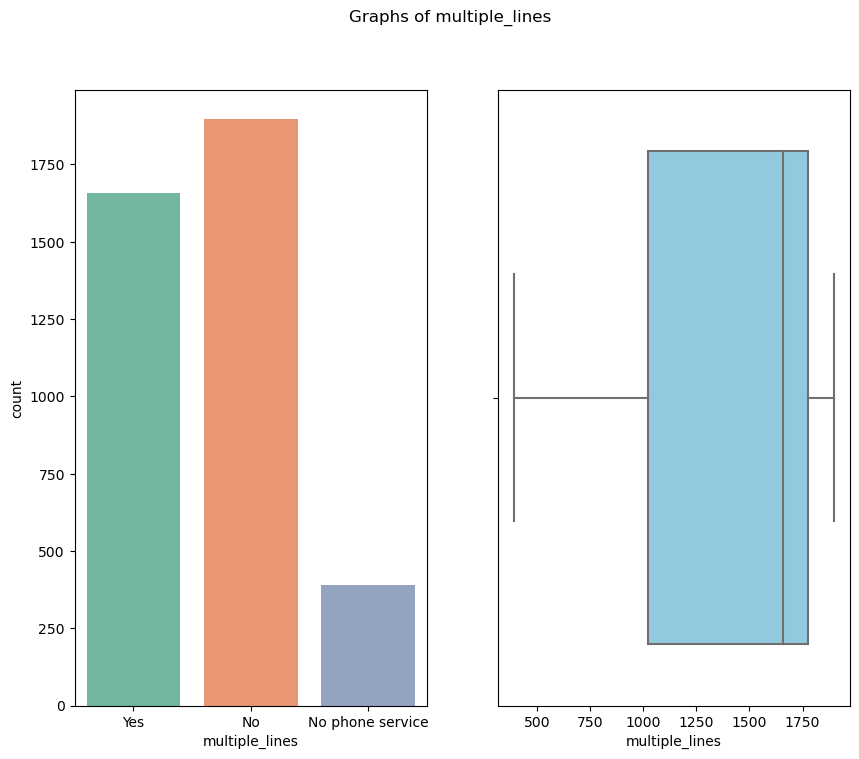

----------###---------
Frequncy of online_security
count     3943
unique       3
top         No
freq      1974
Name: online_security, dtype: object
No                     1974
Yes                    1127
No internet service     842
Name: online_security, dtype: int64


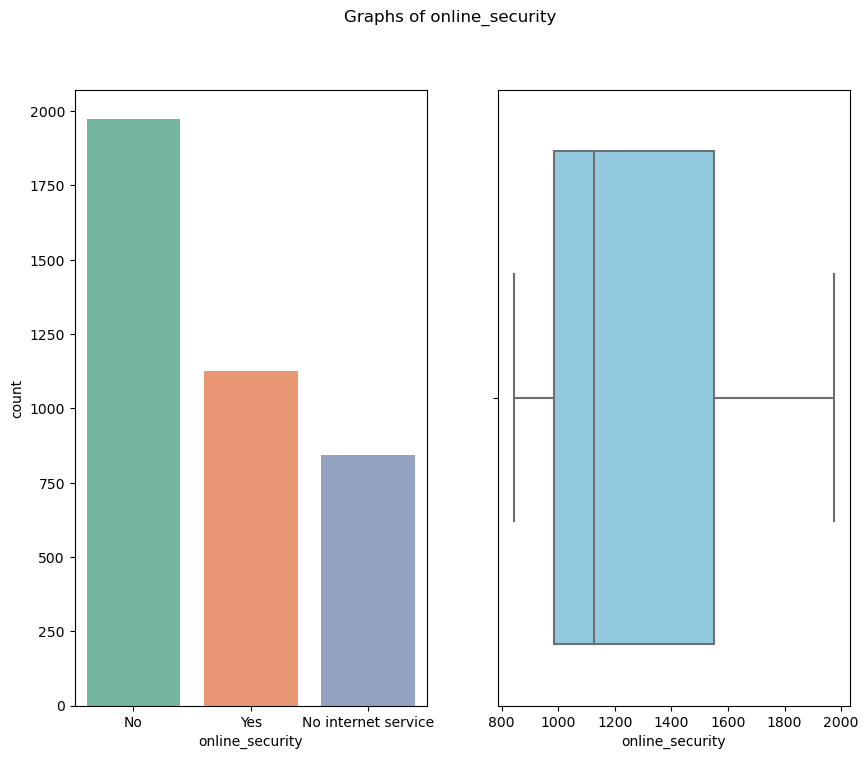

----------###---------
Frequncy of online_backup
count     3943
unique       3
top         No
freq      1712
Name: online_backup, dtype: object
No                     1712
Yes                    1389
No internet service     842
Name: online_backup, dtype: int64


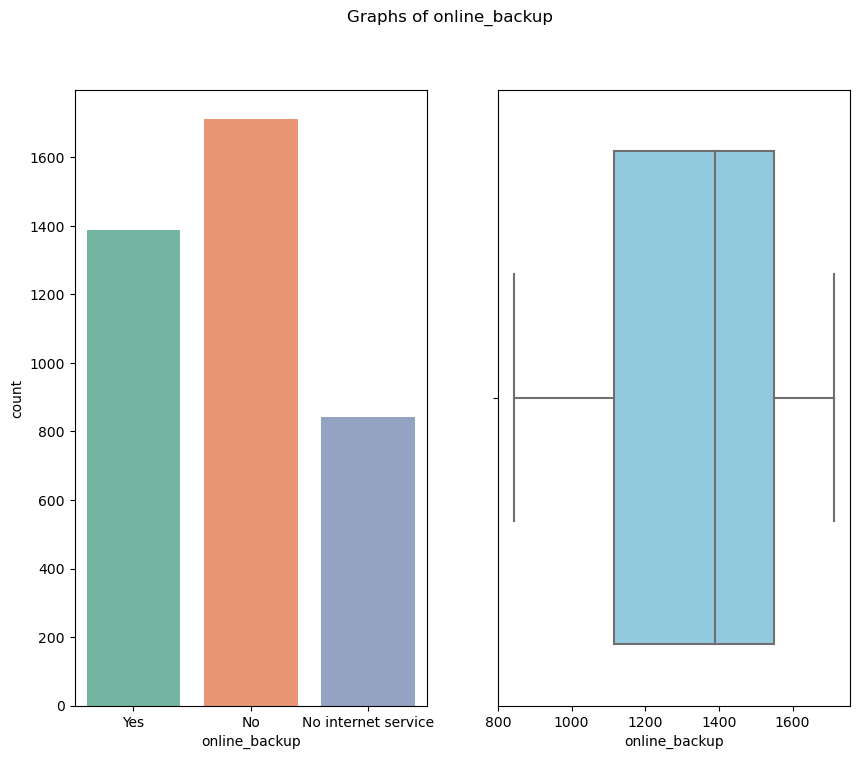

----------###---------
Frequncy of device_protection
count     3943
unique       3
top         No
freq      1746
Name: device_protection, dtype: object
No                     1746
Yes                    1355
No internet service     842
Name: device_protection, dtype: int64


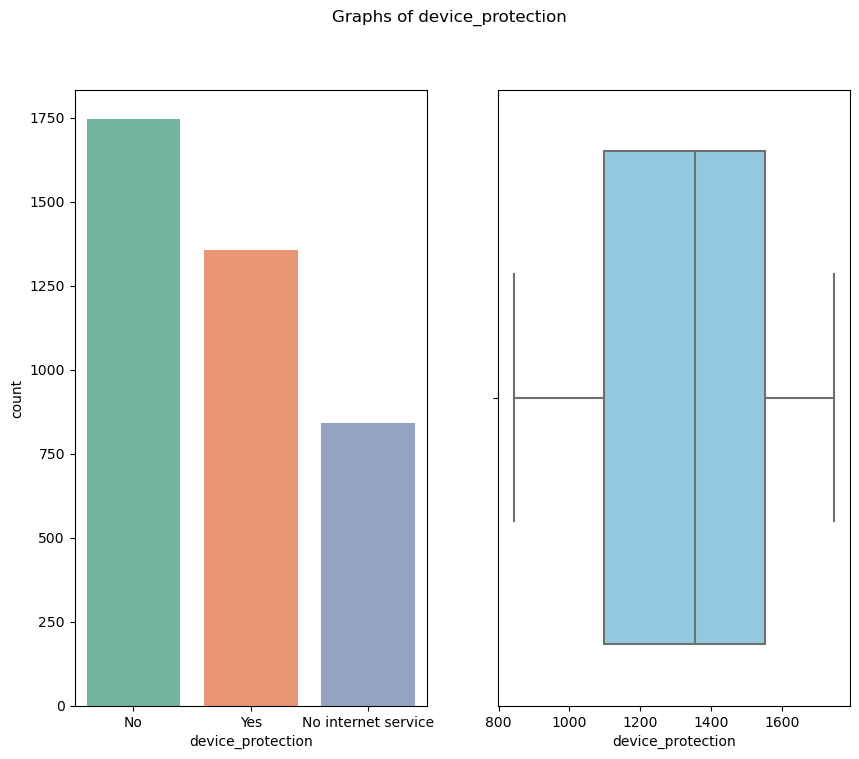

----------###---------
Frequncy of tech_support
count     3943
unique       3
top         No
freq      1967
Name: tech_support, dtype: object
No                     1967
Yes                    1134
No internet service     842
Name: tech_support, dtype: int64


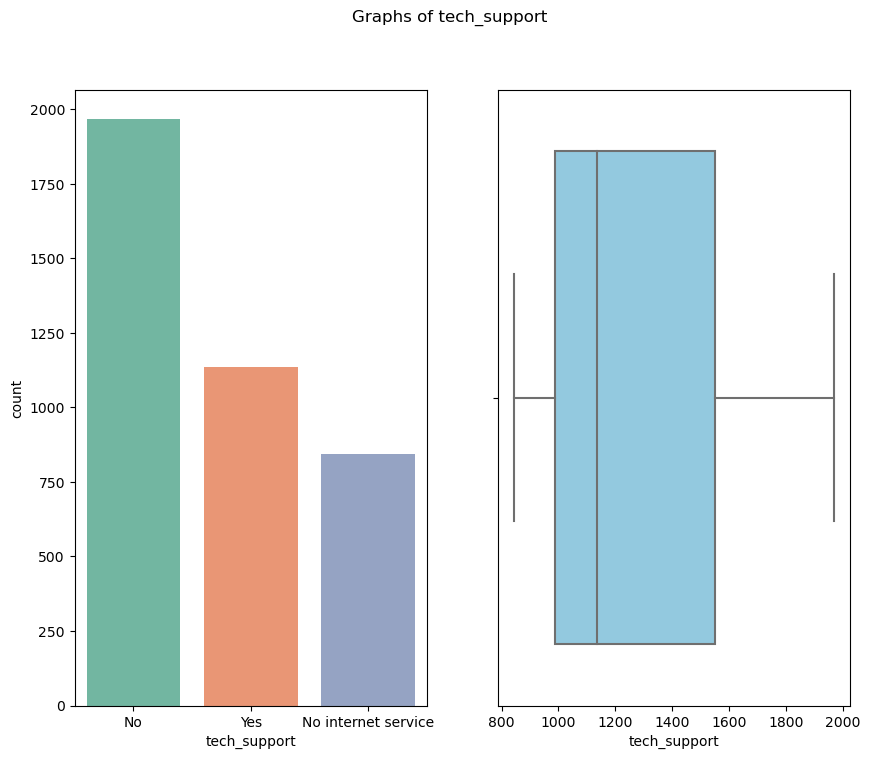

----------###---------
Frequncy of streaming_tv
count     3943
unique       3
top         No
freq      1576
Name: streaming_tv, dtype: object
No                     1576
Yes                    1525
No internet service     842
Name: streaming_tv, dtype: int64


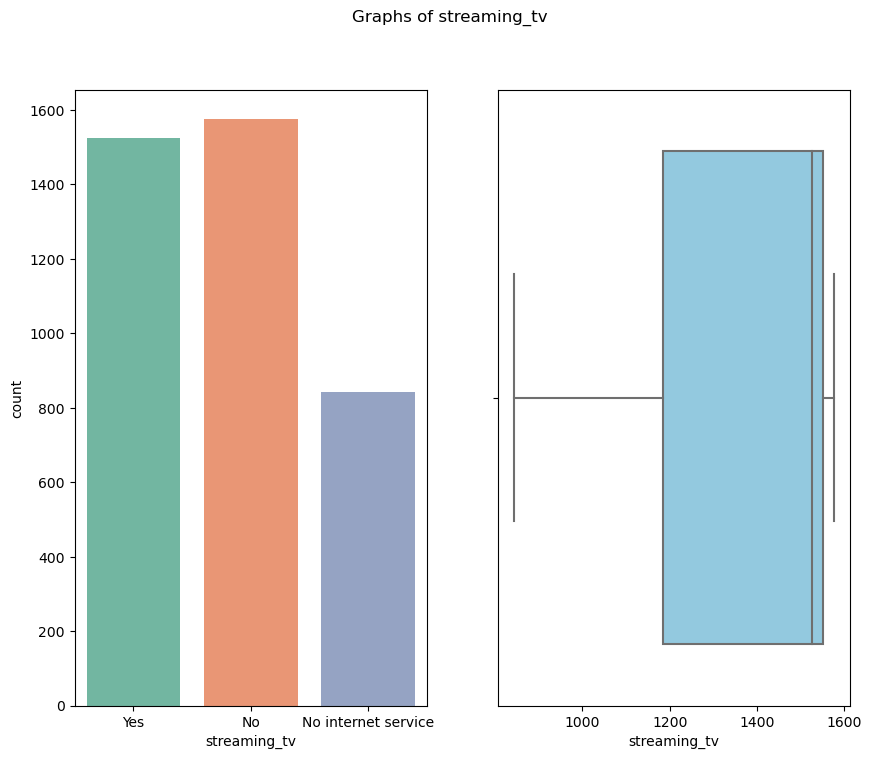

----------###---------
Frequncy of streaming_movies
count     3943
unique       3
top         No
freq      1575
Name: streaming_movies, dtype: object
No                     1575
Yes                    1526
No internet service     842
Name: streaming_movies, dtype: int64


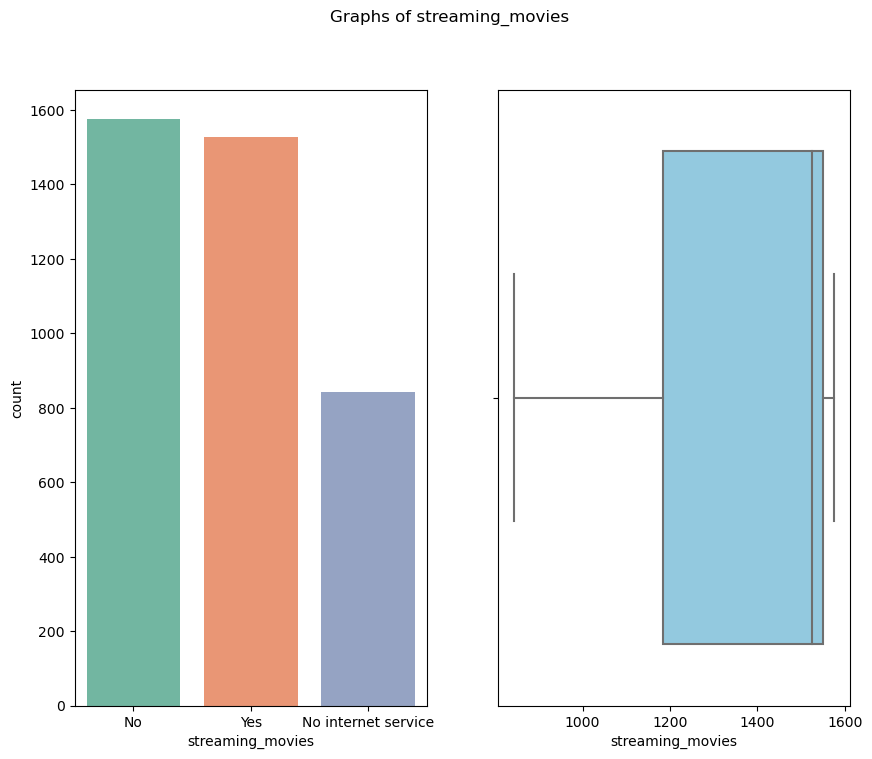

----------###---------
Frequncy of paperless_billing
count     3943
unique       2
top        Yes
freq      2317
Name: paperless_billing, dtype: object
Yes    2317
No     1626
Name: paperless_billing, dtype: int64


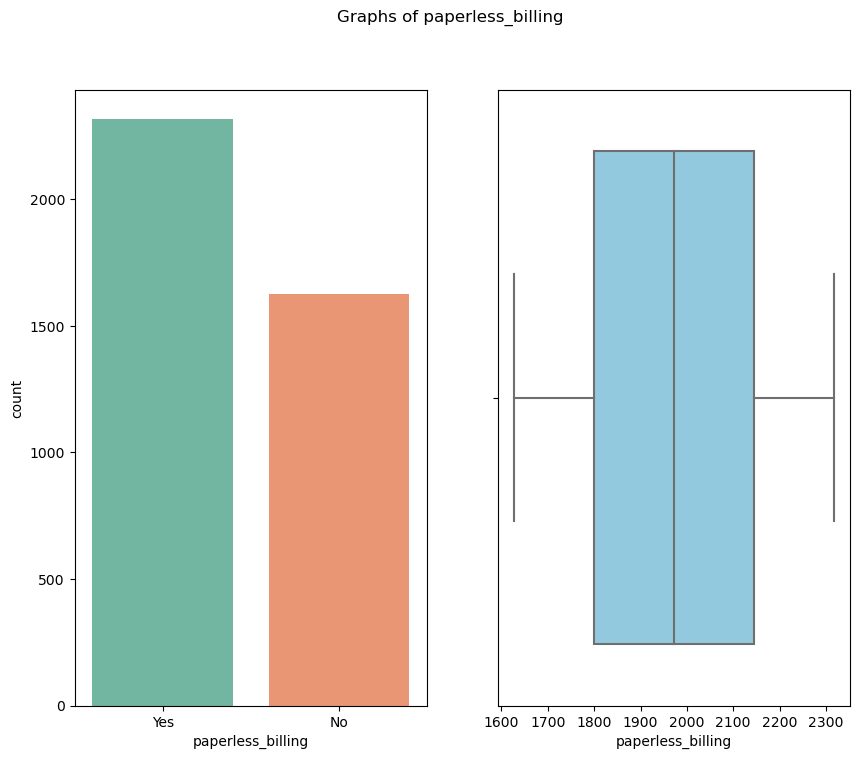

----------###---------
Frequncy of churn
count     3943
unique       2
top         No
freq      2897
Name: churn, dtype: object
No     2897
Yes    1046
Name: churn, dtype: int64


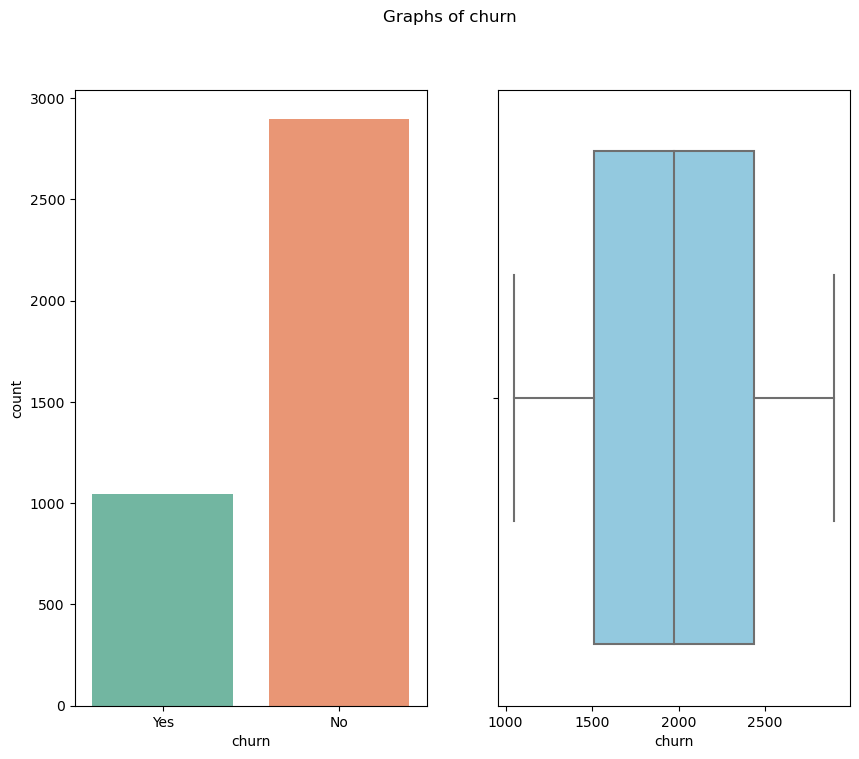

----------###---------
Frequncy of contract_type
count               3943
unique                 3
top       Month-to-month
freq                2171
Name: contract_type, dtype: object
Month-to-month    2171
Two year           946
One year           826
Name: contract_type, dtype: int64


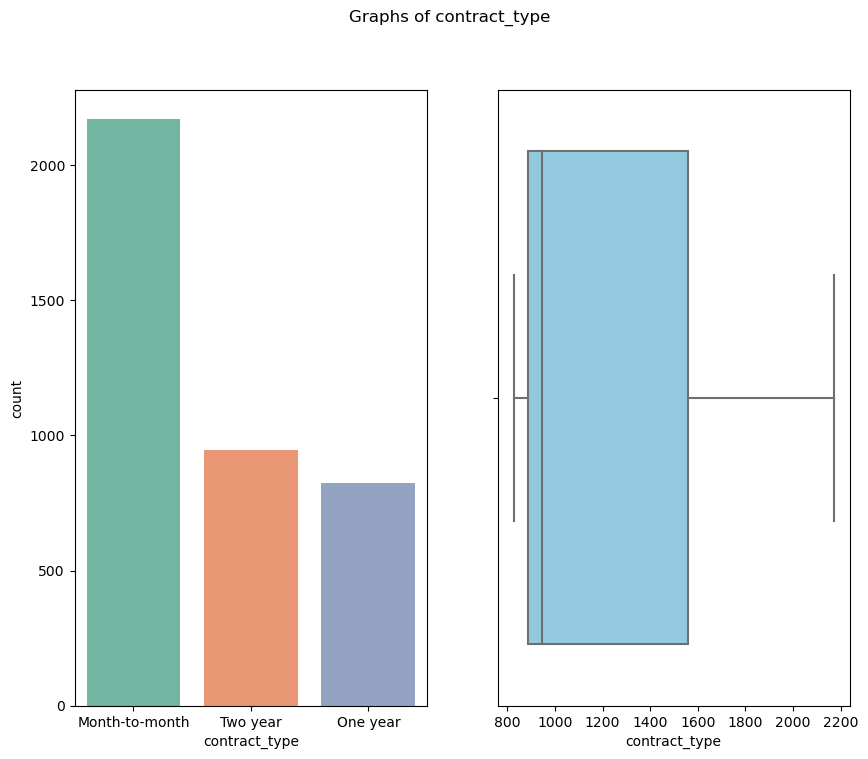

----------###---------
Frequncy of internet_service_type
count            3943
unique              3
top       Fiber optic
freq             1717
Name: internet_service_type, dtype: object
Fiber optic    1717
DSL            1384
None            842
Name: internet_service_type, dtype: int64


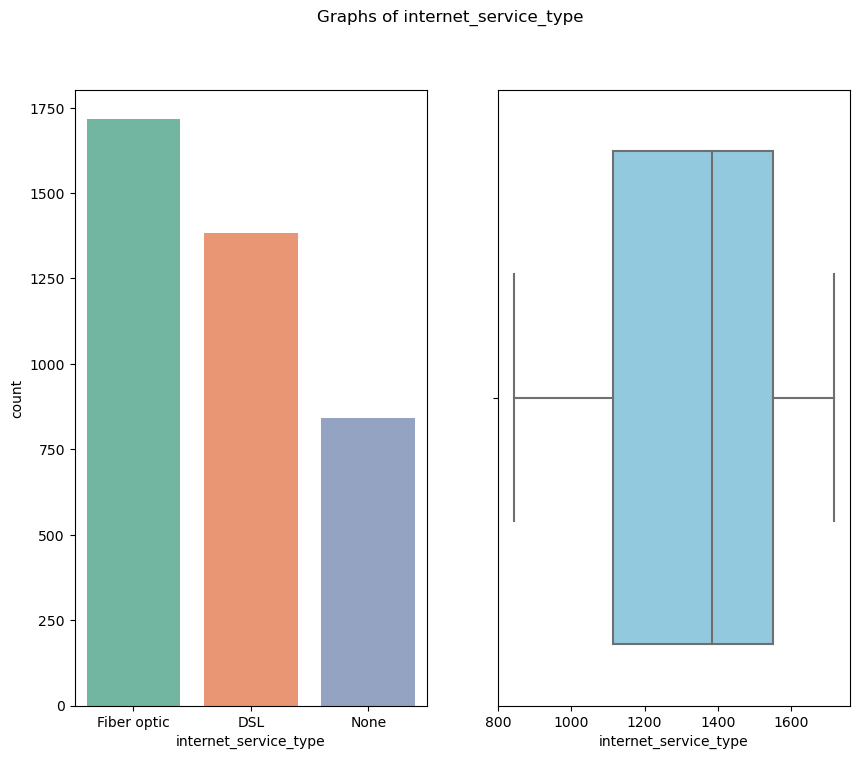

----------###---------
Frequncy of payment_type
count                 3943
unique                   4
top       Electronic check
freq                  1342
Name: payment_type, dtype: object
Electronic check             1342
Mailed check                  933
Bank transfer (automatic)     855
Credit card (automatic)       813
Name: payment_type, dtype: int64


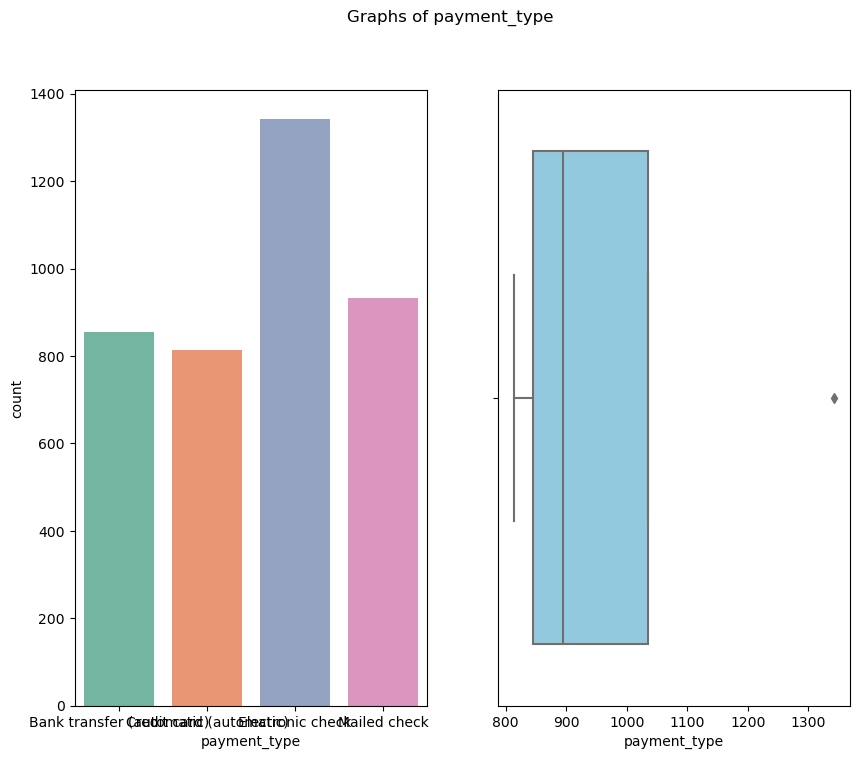

----------###---------


In [13]:
# look at all the categorical features
for col in cat_cols:
    print(f'Frequncy of {col}')
    print(train[col].describe())
    print(train[col].value_counts())
    
    #since there are multiple columns i want them to display side by side
    fig, ax = plt.subplots(1,2, figsize=(10,8))
    fig.suptitle(f'Graphs of {col}')
    
    #plot one: 
    sns.countplot(data = train, x = col, ax=ax[0], palette = 'Set2')
    
    #plot two:
    sns.boxplot(ax=ax[1], data = train, x = train[col].value_counts(), color = 'skyblue')

   
    plt.show()
    print('----------###---------')
    

#### Takeaways: 
- Customer_id can be removed from the dataframe
- Gender ratios are relatively the same
- There is start difference between senior_citzen. 0 indicates that they are not a sernior_citizen while 1 indicatest that they are. 
- Partner coutns are relatively the same
- There are not alot of dependents(individuals who dependent on thier parents) in the data. 
- There is a large amount of observations that do have phone service compared to those that dont.
- There is an even split between people who have who have dont have multiple phone lines compared to those that do, and a small protion of people that do not have phone service at all
- online security, has a higher amount of no's compared to those that do and those that do not have internet service
- there is a more even distribution of device protection, but still has higher no's.
- tech support also seems to be a feature that is not used as often.
- streaming tv seems to comparatively the same
- streaming movies seems to be comparatively the same 
- more people do paperless billing
- month to month contracts seem to be the most popular
- fiber optic is the internet service that has the most customers
- electronic check seems to be the most common payment method

#### Functions:

In [14]:
# create a function to visualize_univar
def visualize_univariate_cat(train, cat_cols):
    for col in cat_cols:
        # Print the frequency of the categorical variable
        print(f'Frequency of {col}')
        print(train[col].describe())
        print(train[col].value_counts())
        
        # Create a side-by-side subplot with two plots
        fig, ax = plt.subplots(1, 2, figsize=(10, 8))
        fig.suptitle(f'Graphs of {col}')
        
        # Plot one: Countplot (bar chart)
        sns.countplot(data=train, x=col, ax=ax[0], palette='Set2')
        
        # Plot two: Boxplot
        sns.boxplot(data=train, x=col, y=train[col].value_counts(), ax=ax[1], color='skyblue')
        
        plt.show()
        print('----------###---------')

In [15]:
#visualize_univariate_cat(train, cat_cols)

## Bivariate statistics
- Visualize each measurement type (y-axis) with the churn variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

In [16]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

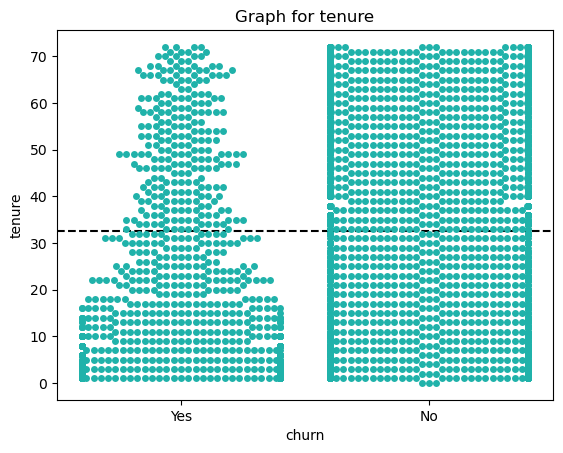

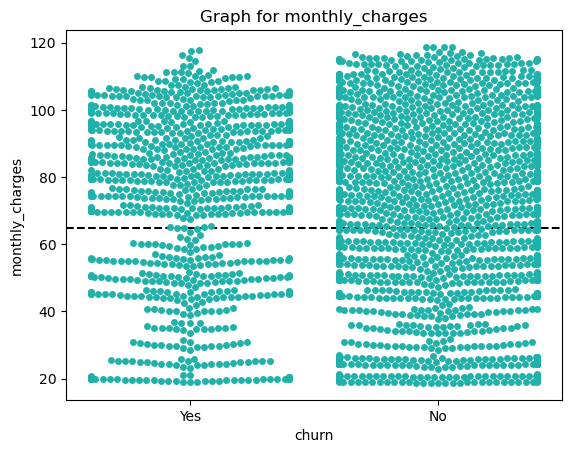

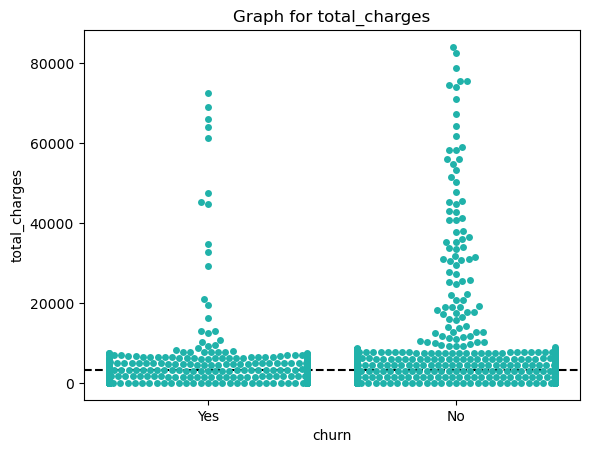

In [18]:
# swarm plot:
for col in num_cols:
    # create the plot:
    sns.swarmplot(data = train, x = target, y = col, color = 'lightseagreen')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()
    

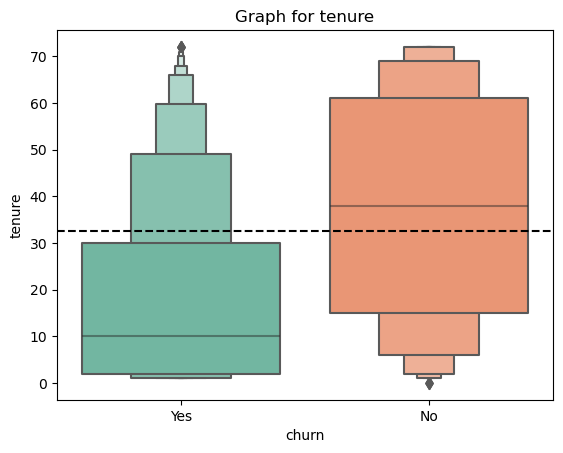

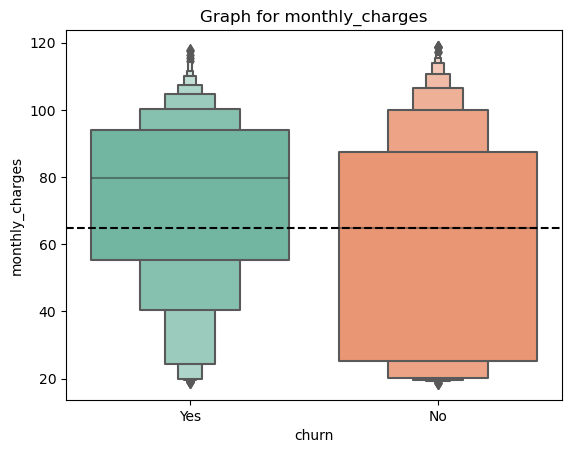

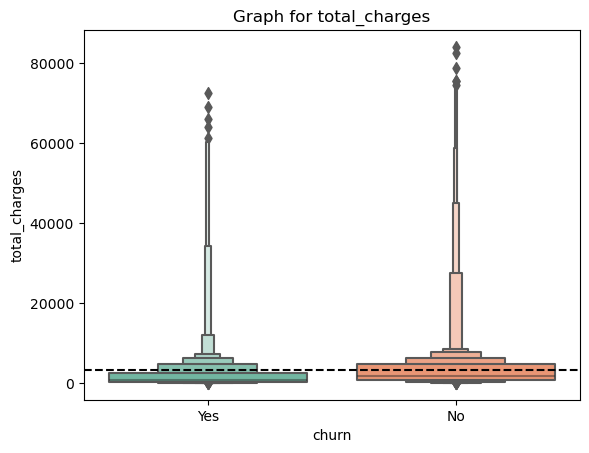

In [22]:
# boxen graph with average mean:
for col in num_cols:
    # create the plot:
    sns.boxenplot(data = train, x = target, y = col, palette = 'Set2')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()

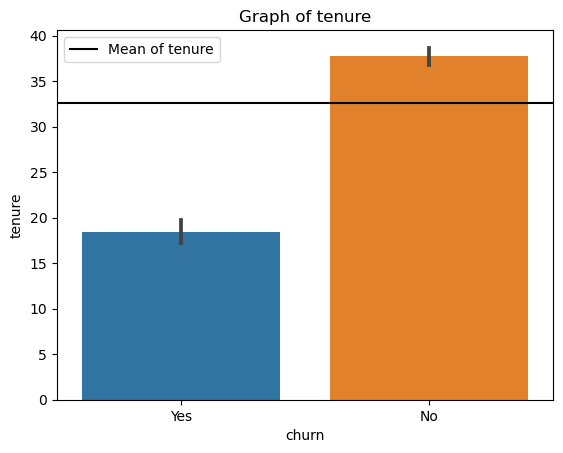

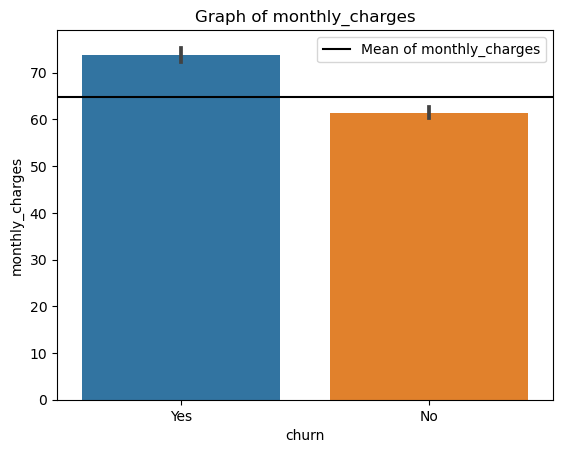

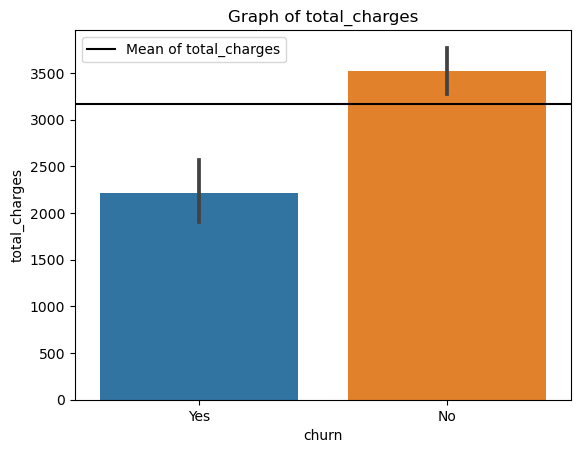

In [24]:
# bar plot
for col in num_cols:
    plt.title(f'Graph of {col}')
    sns.barplot(x = target, y = col, data = train)
    col_mean = train[col].mean()
    plt.axhline(col_mean, label = (f'Mean of {col}'), color = 'black')
    plt.legend()
    plt.show()

In [25]:
sns.color_palette()

NameError: name 'palette' is not defined